In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123456)

import Corrfunc
from Corrfunc.theory.DDsmu import DDsmu
from Corrfunc.theory.DD import DD
from Corrfunc.theory.xi import xi
from Corrfunc.utils import compute_amps
from Corrfunc.utils import evaluate_xi
from Corrfunc.utils import qq_analytic
from Corrfunc.bases import spline

In [2]:
def rand_set(n):
    x = boxsize * np.random.rand(n)
    y = boxsize * np.random.rand(n)
    z = boxsize * np.random.rand(n)
    rand_set = np.array([x,y,z]).T
    return(rand_set)

### Set 1 ("DD")

In [3]:
boxsize = 20.0

set1 = []
set1 = rand_set(50)
set1

array([[ 2.53939666,  1.99473525, 19.86247966],
       [19.33435677, 14.69192444,  0.61880058],
       [ 5.20952012,  0.3308902 ,  7.13000205],
       [17.94473049,  9.62769001,  4.94689902],
       [ 7.53499432,  1.91877748,  3.75836242],
       [ 6.72443489,  9.94612665,  2.26472377],
       [ 9.02752941, 16.77592547, 13.79361127],
       [16.80510167, 17.94666515, 17.7238314 ],
       [ 2.46204289, 14.65183039,  5.58448978],
       [10.86052404, 15.17448728, 13.81657243],
       [ 7.4602445 , 11.21314366, 12.12083625],
       [ 8.95993649,  9.42955855,  1.21948467],
       [ 2.58881359,  2.77536236,  3.37186709],
       [17.19757413,  1.88922267, 18.26635961],
       [16.40776726, 18.84512677, 15.31897736],
       [ 7.04107078,  2.68198479,  4.33607809],
       [ 4.57774609, 12.61399105, 18.72832415],
       [15.53567501, 12.79136435, 13.81856446],
       [11.89567179,  8.66979571, 18.64286072],
       [ 2.75107113,  3.11694121,  5.55998212],
       [17.05799562, 17.25217966,  0.454

In [4]:
set1[:,0]

array([ 2.53939666, 19.33435677,  5.20952012, 17.94473049,  7.53499432,
        6.72443489,  9.02752941, 16.80510167,  2.46204289, 10.86052404,
        7.4602445 ,  8.95993649,  2.58881359, 17.19757413, 16.40776726,
        7.04107078,  4.57774609, 15.53567501, 11.89567179,  2.75107113,
       17.05799562,  4.71014957,  2.92454465, 11.79737546, 11.4802355 ,
        1.22539925, 11.80852007,  4.90699638,  6.80889875, 19.69457479,
       18.3908081 ,  0.75543375, 17.23098579, 15.07137691,  8.1035751 ,
        6.87051751,  3.41834344,  7.8931802 , 12.83332341,  5.49184861,
        9.24708669, 17.42743307,  8.02262444, 12.2117654 ,  2.35934259,
       14.04368722,  8.28067329,  6.84690426, 11.91850642,  3.99728526])

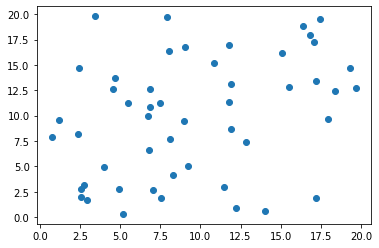

In [5]:
plt.scatter(set1[:,0],set1[:,1])

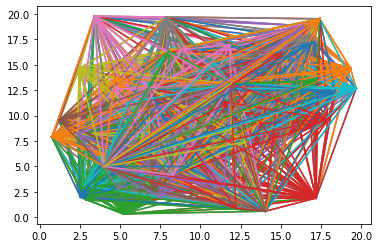

In [6]:
distances1=[]
for i in set1:
    for j in set1:
        d = np.sqrt((i[0]-j[0])**2 + (i[1]-j[1])**2 + (i[2]-j[2])**2)
        distances1.append(d)
        plt.plot([i[0],j[0]],[i[1],j[1]])

In [7]:
len(distances1)

2500

In [8]:
unique_dist1 = list(set(distances1))
print(len(unique_dist1))
unique_dist1

1226


[0.0,
 1.077126386302722,
 2.5851622839739683,
 2.521276423358774,
 4.085123582677397,
 5.200479839285448,
 6.225834363299522,
 7.317324951150264,
 8.546844429711777,
 6.805142734608123,
 10.872431691436883,
 11.557845244592878,
 11.95266660099491,
 13.115407944473802,
 13.004877531785484,
 14.745199180672534,
 16.861327280422387,
 17.245596959656044,
 16.718254052189028,
 19.759053177694106,
 19.080593170402857,
 21.50693430098248,
 22.760950209392774,
 21.0727594552546,
 16.509152716849577,
 22.2914963749744,
 17.94434065981411,
 21.06872301212945,
 28.52382307233463,
 28.64027006796142,
 23.236538539759287,
 26.70003427584435,
 29.923008069777328,
 26.09827518922693,
 25.239414920092024,
 6.819290448076941,
 7.631075229377217,
 7.6112823866157555,
 6.724349695352828,
 17.950245025494436,
 7.983336129419769,
 8.043038871380332,
 8.351586101648422,
 8.032817060404199,
 8.928933707544502,
 8.588259349486208,
 9.871717217139462,
 9.864703425037561,
 9.443003993031283,
 8.013362333678117

#### Binning distances

In [9]:
bins=15
bin_edges = np.linspace(0,boxsize,bins+1)
print(boxsize, bins+1)
bin_edges

20.0 16


array([ 0.        ,  1.33333333,  2.66666667,  4.        ,  5.33333333,
        6.66666667,  8.        ,  9.33333333, 10.66666667, 12.        ,
       13.33333333, 14.66666667, 16.        , 17.33333333, 18.66666667,
       20.        ])

In [10]:
#DD1 = np.zeros(int(bins+1))

In [11]:
#for i in unique_dist1:
#    k = 0
#    while True:
#        if bin_edges[k] <= i < bin_edges[k+1]:
#            DD1[k] = DD1[k]+1
#            break
#        else:
#            k += 1
#DD1

array([  4.,   9.,  20.,  43.,  59.,  88.,  83., 112., 105., 138., 108.,
       101., 104.,  84.,  56.])

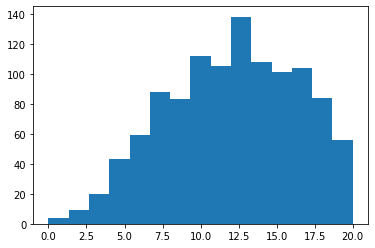

In [12]:
DD, bins1, _ = plt.hist(unique_dist1, bins=bin_edges)
DD

### Set 2 (RR)

In [13]:
set2 = []
set2 = rand_set(80)
set2

array([[19.45282215,  0.21385999,  0.70442336],
       [14.52518608,  9.49042099, 10.87888597],
       [ 8.25301468,  5.1829122 , 10.15833366],
       [19.80006113, 12.14470861,  9.36049637],
       [10.71320466,  6.34184364, 19.47122413],
       [11.185058  ,  5.32926018, 14.54741129],
       [17.34039441, 14.24788031, 14.00972338],
       [ 0.38551457,  8.17323724, 10.30782405],
       [ 2.46193008, 14.11619816,  6.75421482],
       [16.16600192, 18.39999777,  2.15259889],
       [10.958777  , 14.81967249, 13.95758878],
       [ 8.00406061,  2.18314337, 10.83740308],
       [11.50703392,  9.13343135,  0.87173779],
       [16.37383703,  8.25054448,  1.49258841],
       [13.40069202,  9.11988832, 14.34038825],
       [ 2.80348325,  4.73015303, 13.23703278],
       [ 9.8134197 , 15.39388873, 10.493652  ],
       [ 2.40496361, 10.99795303,  8.9250699 ],
       [10.74040806, 10.61320936,  1.32604121],
       [ 2.21935715,  1.87651664, 14.8951344 ],
       [13.16430667,  0.45848827,  7.223

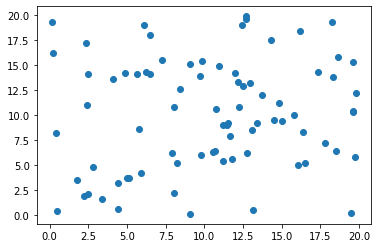

In [14]:
plt.scatter(set2[:,0],set2[:,1])

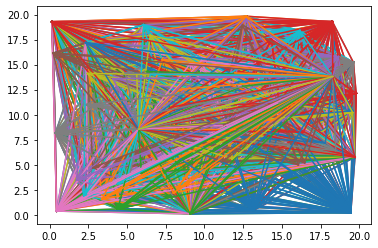

In [15]:
distances2=[]
for i in set2:
    for j in set2:
        d = np.sqrt((i[0]-j[0])**2 + (i[1]-j[1])**2 + (i[2]-j[2])**2)
        distances2.append(d)
        plt.plot([i[0],j[0]],[i[1],j[1]])

In [16]:
unique_dist2 = list(set(distances2))
print(len(unique_dist2))
unique_dist2

3161


[0.0,
 2.736245756917743,
 3.837585830919874,
 4.813114381856824,
 5.8891467913861995,
 6.629604413631569,
 6.176570287054005,
 7.595918969592788,
 6.21695976937329,
 10.98329208015097,
 7.33477566512542,
 6.682110040186529,
 13.580833382628882,
 8.28151563209343,
 15.475903440782545,
 16.91601483904004,
 15.41523583740921,
 18.537421801889455,
 19.45371651065771,
 17.374842679882715,
 21.589949251806473,
 22.784626605180044,
 22.77203101386364,
 21.473820242073383,
 21.32284426206285,
 20.47389433883968,
 21.783139653331382,
 22.386000598974675,
 23.668748257818844,
 23.538838946377894,
 25.833177176705327,
 24.968654589224617,
 27.504907194626938,
 27.174561579394126,
 27.820848763992323,
 7.788763730883261,
 6.2169091294016425,
 9.944263847500421,
 8.74865812947337,
 8.030166558689757,
 8.996096390551543,
 8.298340053034394,
 4.974556576181215,
 9.652231164152568,
 9.69472561898101,
 9.300377382417992,
 9.778951718524809,
 8.580991196354603,
 10.697325010565237,
 10.389320616692999,

array([  2.,  25.,  75., 111., 150., 193., 272., 312., 306., 347., 323.,
       261., 223., 181., 145.])

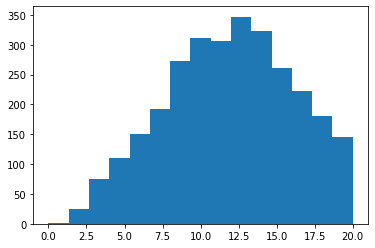

In [17]:
RR, bins2, _ = plt.hist(unique_dist2, bins=bin_edges)
RR

### Calculating correlation function: Peebles & Hauser

In [18]:
nd = len(set1)
nr = len(set2)
nd, nr

(50, 80)

In [19]:
DD_norm = DD/(nd*nd)
RR_norm = RR/(nr*nr)
DD_norm, RR_norm

(array([0.0016, 0.0036, 0.008 , 0.0172, 0.0236, 0.0352, 0.0332, 0.0448,
        0.042 , 0.0552, 0.0432, 0.0404, 0.0416, 0.0336, 0.0224]),
 array([0.0003125 , 0.00390625, 0.01171875, 0.01734375, 0.0234375 ,
        0.03015625, 0.0425    , 0.04875   , 0.0478125 , 0.05421875,
        0.05046875, 0.04078125, 0.03484375, 0.02828125, 0.02265625]))

In [20]:
xi = (DD_norm/RR_norm)-1

In [21]:
print(xi)
print(len(xi))

[ 4.12       -0.0784     -0.31733333 -0.00828829  0.00693333  0.16725389
 -0.21882353 -0.08102564 -0.12156863  0.01809798 -0.14402477 -0.00934866
  0.19390135  0.1880663  -0.01131034]
15


In [22]:
bins_avg=[]
for i in range(len(bin_edges)-1):
    avg = (bin_edges[i+1]+bin_edges[i])/2
    bins_avg.append(avg)
bins_avg

[0.6666666666666666,
 2.0,
 3.333333333333333,
 4.666666666666666,
 6.0,
 7.333333333333333,
 8.666666666666666,
 10.0,
 11.333333333333332,
 12.666666666666666,
 14.0,
 15.333333333333332,
 16.666666666666664,
 18.0,
 19.333333333333332]

Text(0.5, 1.0, '"Manual" $\\xi(r)$')

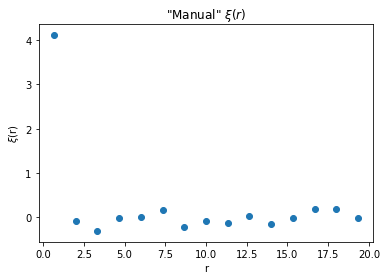

In [55]:
plt.scatter(bins_avg,xi)
plt.xlabel(r'r')
plt.ylabel(r'$\xi$(r)')
plt.title(r'"Manual" $\xi(r)$')

In [24]:
len(bin_edges)-1

15

## Comparing with Corrfunc value

### Corrfunc results (using Landy-Szalay)

In [34]:
bin_edges

array([ 0.        ,  1.33333333,  2.66666667,  4.        ,  5.33333333,
        6.66666667,  8.        ,  9.33333333, 10.66666667, 12.        ,
       13.33333333, 14.66666667, 16.        , 17.33333333, 18.66666667,
       20.        ])

In [35]:
# this cell is needed for all Corrfunc functions! / not just Landy-Szalay
x, y, z = set1[:,0], set1[:,1], set1[:,2]
x_rand, y_rand, z_rand = set2[:,0], set2[:,1], set2[:,2]

rmin = 1.0
rmax = 8.0
nbins = len(bin_edges)-1
r_edges = np.linspace(rmin, rmax, nbins+1)
r_avg = 0.5*(r_edges[1:]+r_edges[:-1])
r_fine = np.linspace(rmin, rmax, 1000)

periodic = False
nthreads = 1
nthreads, r_edges, x, y, z, boxsize, periodic

In [ ]:
dd_res = DD(1, nthreads, r_edges, x, y, z, periodic=periodic)

In [36]:
# tester/comparison cell to debug
#import numpy as np
#from Corrfunc.theory.DD import DD

#L = 20.0
#N = 50
#x = np.random.rand(N)*float(L)
#y = np.random.rand(N)*float(L)
#z = np.random.rand(N)*float(L)
#print(x.shape, y.shape, z.shape)
#print(max(x),max(y),max(z))

#binwidth = 1.0
#rmin = 1.0
#rmax = 8.0
##r_edges = np.arange(rmin, rmax+binwidth, binwidth)
#r_edges = bin_edges

#nthreads = 1
#periodic = False

#dd_res = DD(1, nthreads, r_edges, x, y, z, periodic=periodic)
#print(dd_res)

In [37]:
dr_res = DD(0, nthreads, r_edges, x, y, z, X2=x_rand, Y2=y_rand, Z2=z_rand, boxsize=boxsize, periodic=periodic)
rr_res = DD(1, nthreads, r_edges, x_rand, y_rand, z_rand, boxsize=boxsize, periodic=periodic)

In [38]:
def landy_szalay(nd, nr, dd, dr, rr):
    dd = dd/(nd*nd)
    dr = dr/(nd*nr)
    rr = rr/(nr*nr)
    xi_ls = (dd-2*dr+rr)/rr
    return xi_ls

In [39]:
dd = np.array([x['npairs'] for x in dd_res], dtype=float)
dr = np.array([x['npairs'] for x in dr_res], dtype=float)
rr = np.array([x['npairs'] for x in rr_res], dtype=float)
xi_ls = landy_szalay(nd, nr, dd, dr, rr)
xi_ls

array([ 0.68      , -0.344     , -2.392     , -0.65333333, -0.06105263,
        0.38285714,  0.31789474, -0.3773913 ,  0.09236364,  0.21684211,
        0.35428571,  0.12774194,  0.16606061, -0.39294118,  0.01647059])

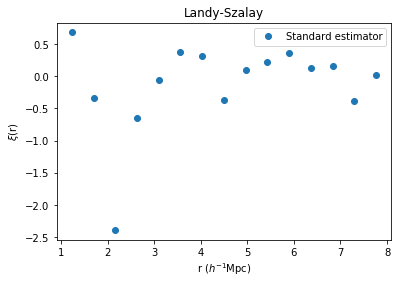

In [65]:
plt.plot(r_avg, xi_ls,'o',label='Standard estimator')
plt.xlabel(r'r ($h^{-1}$Mpc)')
plt.ylabel(r'$\xi$(r)')
plt.title('Landy-Szalay')
plt.legend()

### tophat basis

In [56]:
proj_type = 'tophat'
nprojbins = nbins

In [57]:
nmubins = 1
mumax = 1.0

In [58]:
dd_res, dd_proj, _ = DDsmu(1, nthreads, r_edges, mumax, nmubins, x, y, z,
                           boxsize=boxsize, periodic=periodic, proj_type=proj_type, nprojbins=nprojbins)

In [59]:
dr_res, dr_proj, _ = DDsmu(0, nthreads, r_edges, mumax, nmubins, x, y, z, X2=x_rand, Y2=y_rand, Z2=z_rand,
                           boxsize=boxsize, periodic=periodic, proj_type=proj_type, nprojbins=nprojbins)

In [60]:
rr_res, rr_proj, qq_proj = DDsmu(1, nthreads, r_edges, mumax, nmubins, x_rand, y_rand, z_rand,
                           boxsize=boxsize, periodic=periodic, proj_type=proj_type, nprojbins=nprojbins)

In [61]:
amps = compute_amps(nprojbins, nd, nd, nr, nr, dd_proj, dr_proj, dr_proj, rr_proj, qq_proj)

Computing amplitudes (Corrfunc/utils.py)


In [62]:
print(amps, r_fine, proj_type, r_edges)

[ 0.68       -0.344      -2.392      -0.65333333 -0.06105263  0.38285714
  0.31789474 -0.3773913   0.09236364  0.21684211  0.35428571  0.12774194
  0.16606061 -0.39294118  0.01647059] [1.         1.00700701 1.01401401 1.02102102 1.02802803 1.03503504
 1.04204204 1.04904905 1.05605606 1.06306306 1.07007007 1.07707708
 1.08408408 1.09109109 1.0980981  1.10510511 1.11211211 1.11911912
 1.12612613 1.13313313 1.14014014 1.14714715 1.15415415 1.16116116
 1.16816817 1.17517518 1.18218218 1.18918919 1.1961962  1.2032032
 1.21021021 1.21721722 1.22422422 1.23123123 1.23823824 1.24524525
 1.25225225 1.25925926 1.26626627 1.27327327 1.28028028 1.28728729
 1.29429429 1.3013013  1.30830831 1.31531532 1.32232232 1.32932933
 1.33633634 1.34334334 1.35035035 1.35735736 1.36436436 1.37137137
 1.37837838 1.38538539 1.39239239 1.3993994  1.40640641 1.41341341
 1.42042042 1.42742743 1.43443443 1.44144144 1.44844845 1.45545546
 1.46246246 1.46946947 1.47647648 1.48348348 1.49049049 1.4974975
 1.5045045  1.

In [63]:
xi_proj = evaluate_xi(amps, r_fine, proj_type, rbins=r_edges)
xi_proj

Evaluating xi (Corrfunc/utils.py)


array([ 0.68      ,  0.68      ,  0.68      ,  0.68      ,  0.68      ,
        0.68      ,  0.68      ,  0.68      ,  0.68      ,  0.68      ,
        0.68      ,  0.68      ,  0.68      ,  0.68      ,  0.68      ,
        0.68      ,  0.68      ,  0.68      ,  0.68      ,  0.68      ,
        0.68      ,  0.68      ,  0.68      ,  0.68      ,  0.68      ,
        0.68      ,  0.68      ,  0.68      ,  0.68      ,  0.68      ,
        0.68      ,  0.68      ,  0.68      ,  0.68      ,  0.68      ,
        0.68      ,  0.68      ,  0.68      ,  0.68      ,  0.68      ,
        0.68      ,  0.68      ,  0.68      ,  0.68      ,  0.68      ,
        0.68      ,  0.68      ,  0.68      ,  0.68      ,  0.68      ,
        0.68      ,  0.68      ,  0.68      ,  0.68      ,  0.68      ,
        0.68      ,  0.68      ,  0.68      ,  0.68      ,  0.68      ,
        0.68      ,  0.68      ,  0.68      ,  0.68      ,  0.68      ,
        0.68      ,  0.68      , -0.344     , -0.344     , -0.34

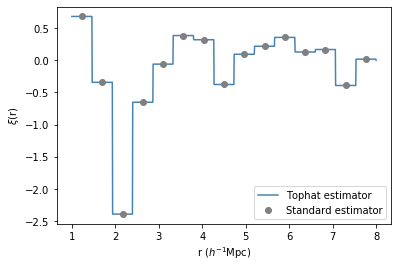

In [64]:
plt.plot(r_fine, xi_proj, color='steelblue', label='Tophat estimator')
plt.plot(r_avg, xi_ls, marker='o', ls='None', color='grey', label='Standard estimator')
plt.xlabel(r'r ($h^{-1}$Mpc)')
plt.ylabel(r'$\xi$(r)')
plt.legend()

### cubic spline

In [66]:
proj_type = 'generalr'
kwargs = {'order': 3} # 3: cubic spline
projfn = 'quadratic_spline.dat'
nprojbins = int(nbins/2)
spline.write_bases(rmin, rmax, nprojbins, projfn, ncont=1000, **kwargs)

'quadratic_spline.dat'

In [67]:
dd_res_spline, dd_spline, _ = DDsmu(1, nthreads, r_edges, mumax, nmubins, x, y, z,
                           boxsize=boxsize, periodic=periodic, proj_type=proj_type, nprojbins=nprojbins, projfn=projfn)

In [68]:
volume = boxsize**3
# nbins and r_edges won't be used here because we passed projfn, but they're needed for compatibility. (TODO: fix!)
rr_ana_spline, qq_ana_spline = qq_analytic(rmin, rmax, nd, volume, nprojbins, proj_type, rbins=r_edges, projfn=projfn)

Evaluating qq_analytic (Corrfunc/utils.py)


In [69]:
numerator = dd_spline - rr_ana_spline
amps_ana_spline = np.linalg.solve(qq_ana_spline, numerator) # Use linalg.solve instead of actually computing inverse!
print("numerator: ",numerator)
print("amps_ana_spline: ",amps_ana_spline)

numerator:  [  2.03220427  -4.18115165 -12.92562518 -40.84640282 -57.82852296
 -57.61901233 -39.28851475]
amps_ana_spline:  [ 2.6332513  -1.41254552  0.21213121 -0.41634591 -0.25983364 -0.3606741
 -0.44391546]


In [70]:
xi_ana_spline = evaluate_xi(amps_ana_spline, r_fine, proj_type, rbins=r_edges, projfn=projfn)

Evaluating xi (Corrfunc/utils.py)


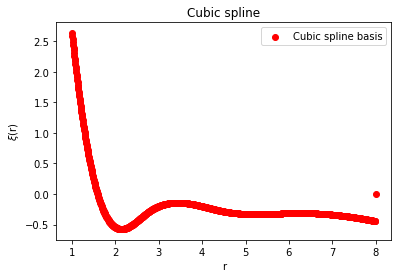

In [72]:
plt.scatter(r_fine, xi_ana_spline, color='red', label='Cubic spline basis')
plt.xlabel(r'r')
plt.ylabel(r'$\xi$(r)')
plt.title('Cubic spline')
plt.legend()

In [40]:
len(xi_ana_spline)

1000

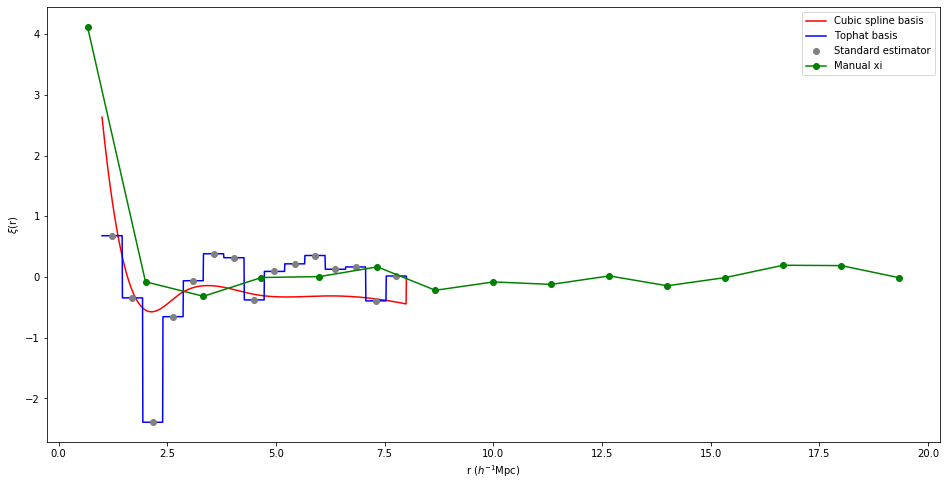

In [88]:
# comparing all results!
plt.figure(figsize=(16,8))
plt.plot(r_fine, xi_ana_spline, color='red', label='Cubic spline basis')
plt.plot(r_fine, xi_proj, color='blue', label='Tophat basis')
plt.plot(r_avg, xi_ls, marker='o', ls='None', color='grey', label='Standard estimator')
plt.plot(bins_avg, xi, '-go', label='Manual xi')
plt.xlabel(r'r ($h^{-1}$Mpc)')
plt.ylabel(r'$\xi$(r)')
plt.legend()